# P2. Investigate a Dataset

## 1. Dataset chosen for analysis: Titanic Dataset
 
  

It contains demographics and passenger information of the passengers and crew on board the Titanic.

## 2. Questions posed

Q1. What factors made people more likely to survive?
(Factors like: age, sex, and class can be analyzed.)
To what extent each factor affected the survival?

Q2. Did passengers that traveled alone have a higher chance of survival than passengers that traveled as a family?

Q3. Does passenger's cabin location help to predict survival? 
    

## 3. Description of the Dataset

titanic_data.csv:
    
Contains information of 891 passengers:
    
    PassengerId --> A unique identifier for the passenger 
    Survived --> 1 if the passenger survived, else 0
    Pclass --> Pclass gives socio-economic status (SES) of the passenger
               1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower
    Name 
    Sex
    Age
    SibSp and Parch --> With respect to the family relation variables (i.e. sibsp and parch)
                        some relations were ignored.  The following are the definitions used
                        for sibsp and parch.

                        Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
                        Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
                        Parent:   Mother or Father of Passenger Aboard Titanic
                        Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic
    Ticket -->  Ticket Number
    Fare --> fare            Passenger Fare
    Cabin 
    Embarked --> embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)


## 4. Observations from the cursory analysis of the dataset



A lot of entries in the files are missing: The passenger cabin location data is largely missing which makes answering the third question:  Does passengers' cabins location help to predict survival? really difficult. However, the entries:  sex, age, pclass, sibsp and Parch are available. So, the first two questions:  What factors made people more likely to survive?
(Factors like: age, sex, and class can be analyzed.)
To what extent each factor affected the survival? and Did passengers that travelled alone have a higher chance of survival than passengers that travelled as a family? can be analyzed


## 5. Loading the data in Python

In [41]:
#Loading the data into dataframes

import pandas as pd

dataset_path='C:/Users/rahul/Desktop/udacity_DA_ND/Investigate_A_Dataset/titanic_data.csv'
passengerinfo_df = pd.read_csv(dataset_path)
passengerinfo_df.tail()

                                      

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


#### The data in titanic_data.csv contains information about 891 passengers. There are a lot of entries missing in the columns age and Cabin.

In [42]:
# dropping entries that have missing data
passengerinfo_df.dropna().tail()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [43]:
total = 891.0
nonmissing_rows=len(passengerinfo_df.dropna())
missing_data_rows = total - nonmissing_rows
print '{} = {}'.format('missing_data_rows', missing_data_rows)

# Finding percentage of missing data

percent_misssing_data =100- len(passengerinfo_df.dropna())*1.0/len(passengerinfo_df)* 100
print '{} = {}'.format('percent_misssing_data', percent_misssing_data)

missing_data_rows = 708.0
percent_misssing_data = 79.4612794613


In [44]:
missing_cabindata_rows = len(passengerinfo_df['Cabin']) - passengerinfo_df['Cabin'].count()
print '{} = {}'.format('missing_cabindata_rows', missing_cabindata_rows)

missing_agedata_rows = len(passengerinfo_df['Age']) - passengerinfo_df['Age'].count()
print '{} = {}'.format('missing_agedata_rows', missing_agedata_rows)


missing_cabindata_rows = 687
missing_agedata_rows = 177


#### 79.46 percent of the records have some missing entries, all these records cannot be removed  just because some entries are missing. Also out of the 708/891 rows that contain missing records, the attribute that is missing in  the majority of rows i.e. 687 rows is the Cabin data which does not affect the analysis much and hence, the missing data is not removed.

## 6. General Statistics

In [45]:
passengerinfo_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### The above table gives general data about the data columns.
    Below are some insights from the above table:
        
1. The most aged passenger was 80 years old.
2. The highest fare taken to board the RMS Titanic was $512.32920.
3. The average age of the passenger aboard the RMS Titanic was 29.69 years.
4. The mean survival stat was 0.3838 where 1='Survived' and 0='Not Survived',
5. The youngest passenger was barely 4 months old.





## 7. Is the survival rate affected by sex?

In [46]:
# Finding the number of male and female passengers

male_pass = (passengerinfo_df[passengerinfo_df['Sex'] == 'male'])
print '{} = {}'.format('Number of male passengers', len(male_pass))

female_pass = (passengerinfo_df[passengerinfo_df['Sex'] == 'female'])
print '{} = {}'.format('Number of female passengers', len(female_pass))

# Finding the percentage of male and female passengers

percent_male = len(male_pass)/total*100
print '{} = {}'.format('percent_male', percent_male)

percent_female = len(female_pass)/total*100
print '{} = {}'.format('percent_female', percent_female)



Number of male passengers = 577
Number of female passengers = 314
percent_male = 64.758698092
percent_female = 35.241301908


Populating the interactive namespace from numpy and matplotlib


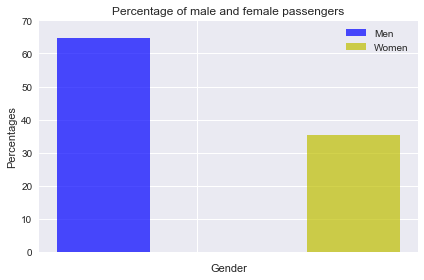

In [47]:
# Plotting the number of male and female passengers

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

def plotbar(data1, data2, title, c1, c2, n, l1,l2, xlabel): 
    n_groups = 1
    means_men = (data1)
    means_women = (data2)

    fig, ax = plt.subplots()

    index = np.arange(n_groups)
    bar_width = 0.3

    opacity = 0.7
    error_config = {'ecolor': '0.3'}

    rects1 = plt.bar(index, means_men, bar_width,
                     alpha=opacity,
                     color=c1,
                     yerr=0,
                     error_kw=error_config,
                     label=l1)

    rects2 = plt.bar(index +0.5 + bar_width, means_women, bar_width,
                     alpha=opacity,
                     color=c2,
                     yerr=0,
                     error_kw=error_config,
                     label=l2)

    plt.xlabel(xlabel)
    plt.ylabel('Percentages')
    plt.title(title)
    plt.xticks(index + bar_width, (''))
    plt.legend()
    plt.yticks(n)

    plt.tight_layout()
    plt.show()
    
plotbar(percent_male, percent_female,'Percentage of male and female passengers','b','y',np.arange(0, 80, 10), 'Men', 'Women', 'Gender')

### Observation:
The male population aboard the Titanic was much higher than the female population.

### 35.24% of the passengers are female whereas the rest of the 64.75% are males

In [48]:
##Finding the percentage of male & female passengers who survived/did not survive
passengerinfo_df.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

#### Out of the total 577 male passengers only 109 survived. The survival rate of male passenger was less than 20%.Out of the total 314 female passengers 233 survived. The survival rate of the female passenger was upto 74%

## 8. Is the survival rate affected by age?

num_of_children = 113
num_of_adults = 601
num_of_children_who_survived = 61
num_of_adults_who_survived = 229
percent_children_who_survived = 53.982300885
percent_adults_who_survived = 38.1031613977


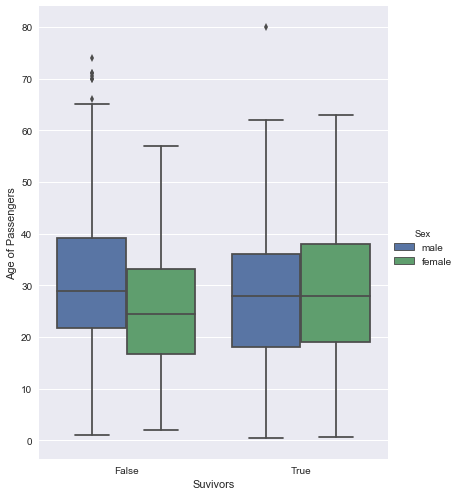

In [49]:
# A graph showing Age of passengers across sex of those who survived
g = sns.factorplot(x="Survived", y="Age", hue='Sex', data=passengerinfo_df, kind="box", size=7, aspect=.8)

# Fix up the labels
(g.set_axis_labels('Suvivors', 'Age of Passengers')
    .set_xticklabels(["False", "True"])
)

# Finding the number of children and adults who survived

num_of_children= len(passengerinfo_df[passengerinfo_df['Age'] < 18])
num_of_adults= len(passengerinfo_df[passengerinfo_df['Age'] >= 18])

num_of_children_who_survived= len(passengerinfo_df[(passengerinfo_df['Age'] < 18) & (passengerinfo_df['Survived'] == 1)])
num_of_adults_who_survived= len(passengerinfo_df[(passengerinfo_df['Age'] >= 18) & (passengerinfo_df['Survived'] == 1)])

print '{} = {}'.format('num_of_children',  num_of_children)
print '{} = {}'.format('num_of_adults', num_of_adults)
print '{} = {}'.format('num_of_children_who_survived', num_of_children_who_survived)
print '{} = {}'.format('num_of_adults_who_survived', num_of_adults_who_survived)

# Finding percentages of children and adults who survived

percent_children_who_survived = num_of_children_who_survived*1.0/num_of_children * 100
percent_adults_who_survived = num_of_adults_who_survived*1.0/num_of_adults * 100

print '{} = {}'.format('percent_children_who_survived', percent_children_who_survived)
print '{} = {}'.format('percent_adults_who_survived', percent_adults_who_survived)


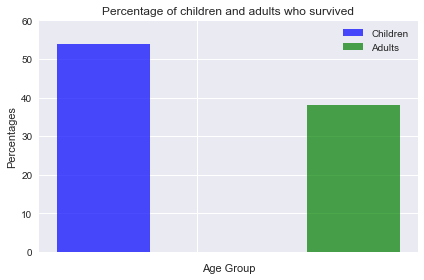

In [50]:
##Plotting the percentages of children and adults who survived

plotbar(percent_children_who_survived, percent_adults_who_survived, 'Percentage of children and adults who survived','b','g',np.arange(0, 70, 10),'Children','Adults', 'Age Group')

### Observation:
The percentage of children who survived is relatively greater.

#### 53.98 percent of the children aboard RMS titanic survived whereas only 38.10 percent adults made it. 

In statistics, the Mann–Whitney U test is a nonparametric test of the null hypothesis that two samples come from the same population against an alternative hypothesis, especially that a particular population tends to have larger values than the other.



In [51]:
##Employing Mann–Whitney U test

import scipy
import scipy.stats


def mann_whitney_test_means(a):
    survive = passengerinfo_df[passengerinfo_df.Survived == 1][a]
    not_survive = passengerinfo_df[passengerinfo_df.Survived == 0][a]
    survive_mean = np.mean(survive)
    not_survive_mean = np.mean(not_survive)
    U,p = scipy.stats.mannwhitneyu(survive,not_survive)
    return survive_mean, not_survive_mean, U, p

mann_whitney_test_means('Age')

(28.343689655172415, 30.626179245283019, 81592.0, 0.00050215422146319716)

Result:

P-value: 0.00050215422146319716

Its less than 0.05. This means that the null hypothesis that the mean age of survivors is equal to mean age of victims is rejected.The mean age of a survivor is lesser than that of a victim

#### The survival rate of a child is much higher than the survival rate of an adult

## 9. Is the survival rate affected by class?

In [52]:


# Finding the number of passengers belonging to first, second and third class

num_of_fclass= len(passengerinfo_df[passengerinfo_df['Pclass'] ==1])
num_of_sclass= len(passengerinfo_df[passengerinfo_df['Pclass'] ==2])
num_of_tclass= len(passengerinfo_df[passengerinfo_df['Pclass'] ==3])

# Finding the number of passengers belonging to first, second and third class who did survive/did not survive

num_of_fclass_who_survived= len(passengerinfo_df[(passengerinfo_df['Pclass'] == 1) & (passengerinfo_df['Survived'] == 1)])
num_of_sclass_who_survived= len(passengerinfo_df[(passengerinfo_df['Pclass'] == 2) & (passengerinfo_df['Survived'] == 1)])
num_of_tclass_who_survived= len(passengerinfo_df[(passengerinfo_df['Pclass'] == 3) & (passengerinfo_df['Survived'] == 1)])

num_of_fclass_who_didnt_survive= num_of_fclass-num_of_fclass_who_survived
num_of_sclass_who_didnt_survive= num_of_sclass-num_of_sclass_who_survived 
num_of_tclass_who_didnt_survive= num_of_tclass-num_of_tclass_who_survived

print '{} = {}'.format('num_of_fclass', num_of_fclass)
print '{} = {}'.format('num_of_sclass', num_of_sclass)
print '{} = {}'.format('num_of_tclass', num_of_tclass)
print '{} = {}'.format('num_of_fclass_who_survived', num_of_fclass_who_survived)
print '{} = {}'.format('num_of_sclass_who_survived', num_of_sclass_who_survived)
print '{} = {}'.format('num_of_tclass_who_survived', num_of_tclass_who_survived)
print '{} = {}'.format('num_of_fclass_who_didnt_survive ', num_of_fclass_who_didnt_survive )
print '{} = {}'.format('num_of_sclass_who_didnt_survive',  num_of_sclass_who_didnt_survive)
print '{} = {}'.format('num_of_tclass_who_didnt_survive', num_of_tclass_who_didnt_survive)


# Finding percentages of people belonging to the first, second, third class who did/did not survive

percent_fclass_who_survived = num_of_fclass_who_survived*1.0/num_of_fclass * 100
percent_sclass_who_survived = num_of_sclass_who_survived*1.0/num_of_sclass * 100
percent_tclass_who_survived = num_of_tclass_who_survived*1.0/num_of_tclass * 100

print '{} = {}'.format('percent_fclass_who_survived', percent_fclass_who_survived)
print '{} = {}'.format('percent_sclass_who_survived', percent_sclass_who_survived)
print '{} = {}'.format('percent_tclass_who_survived', percent_tclass_who_survived)


num_of_fclass = 216
num_of_sclass = 184
num_of_tclass = 491
num_of_fclass_who_survived = 136
num_of_sclass_who_survived = 87
num_of_tclass_who_survived = 119
num_of_fclass_who_didnt_survive  = 80
num_of_sclass_who_didnt_survive = 97
num_of_tclass_who_didnt_survive = 372
percent_fclass_who_survived = 62.962962963
percent_sclass_who_survived = 47.2826086957
percent_tclass_who_survived = 24.2362525458


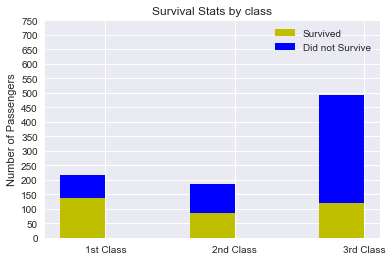

In [53]:
# Plotting percentages of people belonging to the first, second, third class who did/did not survive

import numpy as np
import matplotlib.pyplot as plt


N = 3
survivedMeans = (num_of_fclass_who_survived, num_of_sclass_who_survived, num_of_tclass_who_survived)
notsurvivedMeans = (num_of_fclass_who_didnt_survive, num_of_sclass_who_didnt_survive, num_of_tclass_who_didnt_survive)

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, survivedMeans, width, color='y')
p2 = plt.bar(ind, notsurvivedMeans, width, color='b',
             bottom=survivedMeans)

plt.ylabel('Number of Passengers')
plt.title('Survival Stats by class')
plt.xticks(ind + width/2., ('1st Class', '2nd Class', '3rd Class'))
plt.yticks(np.arange(0, 800, 50))
plt.legend((p1[0], p2[0]), ('Survived', 'Did not Survive'))

plt.show()


### Observation:
The survival rate of a first class passenger is much higher than the survival rate of the second class passenger, and the survival rate of a second class passenger is much higher than the survival rate of a third class passenger

#### 62.96 percent of the 1st class passengers survived whereas, 47.28 percent of the 2nd class passengers survived and only 24.23 percent of the 3rd class passengers survived

## 10. Relationship between Class, Sex and rate of survival

In [54]:
# Finding number of males, females belonging to different classes 

num_of_fclass_male= len(passengerinfo_df[(passengerinfo_df['Pclass'] ==1) & (passengerinfo_df['Sex'] == "male")])
num_of_sclass_male= len(passengerinfo_df[(passengerinfo_df['Pclass'] ==2) & (passengerinfo_df['Sex'] == "male")])
num_of_tclass_male= len(passengerinfo_df[(passengerinfo_df['Pclass'] ==3) & (passengerinfo_df['Sex'] == "male")])

num_of_fclass_female= len(passengerinfo_df[(passengerinfo_df['Pclass'] ==1) & (passengerinfo_df['Sex'] == "female")])
num_of_sclass_female= len(passengerinfo_df[(passengerinfo_df['Pclass'] ==2) & (passengerinfo_df['Sex'] == "female")])
num_of_tclass_female= len(passengerinfo_df[(passengerinfo_df['Pclass'] ==3) & (passengerinfo_df['Sex'] == "female")])

num_of_fclass_female_who_survived= len(passengerinfo_df[(passengerinfo_df['Pclass'] == 1) & (passengerinfo_df['Survived'] == 1) & (passengerinfo_df['Sex']=="female")])
num_of_fclass_male_who_survived= len(passengerinfo_df[(passengerinfo_df['Pclass'] == 1) & (passengerinfo_df['Survived'] == 1) & (passengerinfo_df['Sex']=="male")])
num_of_sclass_female_who_survived= len(passengerinfo_df[(passengerinfo_df['Pclass'] == 2) & (passengerinfo_df['Survived'] == 1) & (passengerinfo_df['Sex']=="female")])
num_of_sclass_male_who_survived= len(passengerinfo_df[(passengerinfo_df['Pclass'] == 2) & (passengerinfo_df['Survived'] == 1) & (passengerinfo_df['Sex']=="male")])
num_of_tclass_female_who_survived= len(passengerinfo_df[(passengerinfo_df['Pclass'] == 3) & (passengerinfo_df['Survived'] == 1) & (passengerinfo_df['Sex']=="female")])
num_of_tclass_male_who_survived= len(passengerinfo_df[(passengerinfo_df['Pclass'] == 3) & (passengerinfo_df['Survived'] == 1) & (passengerinfo_df['Sex']=="male")])

##Finding percentages of males, females belonging to different classes 

percent_fclass_female= num_of_fclass_female_who_survived*1.0/num_of_fclass_female*100
percent_fclass_male= num_of_fclass_male_who_survived*1.0/num_of_fclass_male*100
percent_sclass_female= num_of_sclass_female_who_survived*1.0/num_of_sclass_female*100
percent_sclass_male= num_of_sclass_male_who_survived*1.0/num_of_sclass_male*100
percent_tclass_female= num_of_tclass_female_who_survived*1.0/num_of_tclass_female*100
percent_tclass_male= num_of_tclass_male_who_survived*1.0/num_of_tclass_male*100

print '{} = {}'.format('percent_fclass_male', percent_fclass_male)
print '{} = {}'.format('percent_sclass_female', percent_sclass_female)
print '{} = {}'.format('percent_sclass_male', percent_sclass_male)
print '{} = {}'.format('percent_tclass_female', percent_tclass_female)
print '{} = {}'.format('percent_tclass_male', percent_tclass_male)

percent_fclass_male = 36.8852459016
percent_sclass_female = 92.1052631579
percent_sclass_male = 15.7407407407
percent_tclass_female = 50.0
percent_tclass_male = 13.5446685879


Populating the interactive namespace from numpy and matplotlib


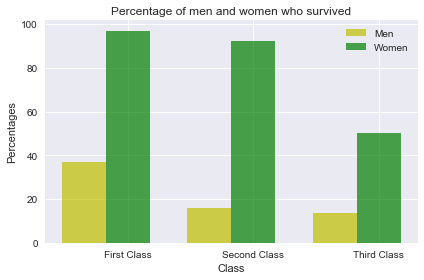

In [55]:
# Plotting percentages of males, females belonging to different classes 

import numpy as np
import matplotlib.pyplot as plt
%pylab inline


n_groups = 3

means_men = (percent_fclass_male, percent_sclass_male, percent_tclass_male)

means_women = (percent_fclass_female, percent_sclass_female, percent_tclass_female)


fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.7
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, means_men, bar_width,
                 alpha=opacity,
                 color='y',
                 yerr=0,
                 error_kw=error_config,
                 label='Men')

rects2 = plt.bar(index + bar_width, means_women, bar_width,
                 alpha=opacity,
                 color='g',
                 yerr=0,
                 error_kw=error_config,
                 label='Women')

plt.xlabel('Class')
plt.ylabel('Percentages')
plt.title('Percentage of men and women who survived')
plt.xticks(index + bar_width, ('First Class', 'Second Class', 'Third Class'))
plt.legend()

plt.tight_layout()
plt.show()

### Observation:
    
Percentage of female survival in first class > Percentage of female survival in second class > Percentage of female survival in the third class

Percentage of male survival in first class > Percentage of male survival in second class > Percentage of male survival in the third class


#### The graph shows the percentage of men and women through different classes who survived


## 11. Investigating whether if you are traveling alone or with family would affect the survival rate.

In [56]:
# Number of passengers who are not travelling alone

not_alone = (passengerinfo_df[(passengerinfo_df['SibSp']>0) | (passengerinfo_df['Parch']>0)])

# Number of passengers who are travelling alone

alone = (passengerinfo_df[(passengerinfo_df['SibSp']==0) & (passengerinfo_df['Parch']==0)])

not_alone_survived = (passengerinfo_df[((passengerinfo_df['SibSp']>0) | (passengerinfo_df['Parch']>0)) & passengerinfo_df['Survived']])
alone_survived = (passengerinfo_df[((passengerinfo_df['SibSp']==0) & (passengerinfo_df['Parch']==0)) & passengerinfo_df['Survived']])

# Percentages of passengers who are travelling alone/are not travelling alone who survived/did not survive

percent_not_alone_survived = len(not_alone_survived)* 1.0/len(not_alone)*100
percent_alone_survived = len(alone_survived)* 1.0/len(alone)*100

print '{} = {}'.format('percent_not_alone_survived', percent_not_alone_survived)
print '{} = {}'.format('percent_alone_survived', percent_alone_survived)


percent_not_alone_survived = 50.5649717514
percent_alone_survived = 30.3538175047


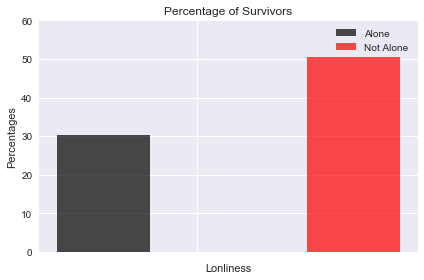

In [57]:
# Plotting percentages of passengers who are travelling alone/are not travelling alone who survived/did not survive


plotbar(percent_alone_survived, percent_not_alone_survived, 'Percentage of Survivors','black','red',np.arange(0, 70, 10),'Alone','Not Alone','Lonliness')

### Observation:
Percentage of survivors is more amongst people travelling in company

In [58]:
import numpy as np
import scipy
import scipy.stats
import pandas

def mann_whitney_test_fmeans():
    survive = passengerinfo_df[passengerinfo_df.Survived == 1]['SibSp']+passengerinfo_df[passengerinfo_df.Survived == 1]['Parch']
    not_survive = passengerinfo_df[passengerinfo_df.Survived == 0]['SibSp']+passengerinfo_df[passengerinfo_df.Survived == 0]['Parch']
    survive_mean = np.mean(survive)
    not_survive_mean = np.mean(not_survive)
    U,p = scipy.stats.mannwhitneyu(survive,not_survive)
    return survive_mean, not_survive_mean, U, p

mann_whitney_test_fmeans()

(0.93859649122807021, 0.88342440801457189, 77659.0, 3.9854006354579223e-07)


Result:
    
P-value:  3.9854006354579223e-07
Its less than 0.05. This means that the null hypothesis that is rejected. The mean co-passenger value is higher for the survivors.

#### The people who travelled with company had a higher survival rate than those who did not.

## 13. Conclusion

#### 1. From a total of 577 male passengers, only 109 i.e less than 20 percent survived. However, out of the total 314 female passengers, 233 i.e upto 74 percent of the female population aboard RMS Titanic survived. The survival rate of female passengers was much greater than that of male passengers.
#### 2. A higher percentage of children made it through as compared to the adults.
#### 3. 62.96 percent of the 1st class passengers survived whereas, the survival percentage amongst the third class passengers was only a third of this.
#### 4. It is observed that the rate of survival is higher for the passengers travelling with family as compared to those travelling alone.

## Issues

#### 1. A portion of men and women did not have Age data and were removed from calculations which could have skewed some numbers
#### 2. The category of 'children' was assumed to be anyone under the age of 18, using today's North American standard for adulthood which was certainly not the case in the 1900s

## 14. References


https://www.kaggle.com/c/titanic/prospector#1234

http://cs229.stanford.edu/proj2012/LamTang-TitanicMachineLearningFromDisaster.pdf

https://www.kaggle.com/omarelgabry/titanic/a-journey-through-titanic